# Mission 3-1

# 3.1.1 필요 라이브러리 import 하기

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import os

# 3.1.2 Mission 2-2에서 R_id기준으로 상위100개를 추출한 Dataset Load하기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/top_100_r_id_table.csv')
data.head(10)

,응답자ID,Training 스타일 선호,Training 스타일 비선호,Validation 스타일 선호,Validation 스타일 비선호
0,64747,"W_03194_50_classic_W.jpg, W_04972_90_kitsch_W....","W_02247_50_classic_W.jpg, W_02498_50_feminine_...","W_05628_00_cityglam_W.jpg, W_20598_70_military...","W_02498_50_feminine_W.jpg, W_11610_90_grunge_W..."
1,63405,"W_00023_60_mods_M.jpg, W_00555_50_ivy_M.jpg, W...","W_00530_10_sportivecasual_M.jpg, W_02714_00_me...","W_01853_60_mods_M.jpg, W_02677_60_mods_M.jpg, ...","W_07187_70_hippie_M.jpg, W_12304_80_bold_M.jpg..."
2,64346,"W_00047_70_hippie_M.jpg, W_00856_10_sportiveca...","W_02678_50_ivy_M.jpg, W_07112_90_hiphop_M.jpg,...","W_07316_00_metrosexual_M.jpg, W_09154_50_ivy_M...","W_00496_60_mods_M.jpg, W_16121_80_bold_M.jpg, ..."
3,64561,"W_06046_10_sportivecasual_W.jpg, W_18066_50_cl...","W_02232_70_hippie_W.jpg, W_08584_50_feminine_W...","W_06046_10_sportivecasual_W.jpg, W_18205_50_fe...","W_22943_10_athleisure_W.jpg, W_23519_60_minima..."
4,65139,"W_06684_60_mods_M.jpg, W_15891_80_bold_M.jpg, ...","W_01898_19_normcore_M.jpg, W_06259_50_ivy_M.jp...",W_63644_10_sportivecasual_M.jpg,"W_24517_70_hippie_M.jpg, W_24717_60_mods_M.jpg..."
5,66513,"T_05088_19_normcore_W.jpg, T_07416_19_lounge_W...","T_08306_10_sportivecasual_W.jpg, T_08918_19_no...",W_14828_50_classic_W.jpg,"T_06910_50_classic_W.jpg, W_10984_50_feminine_..."
6,59704,"W_00489_60_mods_M.jpg, W_00803_50_ivy_M.jpg, W...","W_00026_10_sportivecasual_M.jpg, W_00517_70_hi...","W_01549_50_ivy_M.jpg, W_01853_60_mods_M.jpg, W...","W_06875_90_hiphop_M.jpg, W_12476_90_hiphop_M.j..."
7,60173,"W_00152_50_feminine_W.jpg, W_00729_10_sportive...","W_00237_60_popart_W.jpg, W_00351_70_hippie_W.j...","W_00152_50_feminine_W.jpg, W_06015_80_powersui...","W_00351_70_hippie_W.jpg, W_01236_10_sportiveca..."
8,62952,"W_01178_00_oriental_W.jpg, W_02403_70_punk_W.j...","W_03771_00_oriental_W.jpg, W_03945_50_classic_...","W_01178_00_oriental_W.jpg, W_45137_00_ecology_...","W_03771_00_oriental_W.jpg, W_05818_90_lingerie..."
9,63369,"W_00507_90_hiphop_M.jpg, W_00848_19_normcore_M...","W_01509_00_metrosexual_M.jpg, W_02840_19_normc...","W_01549_50_ivy_M.jpg, W_06525_60_mods_M.jpg, W...","W_11067_00_metrosexual_M.jpg, W_12106_80_bold_..."


# 3.1.3  이미지 데이터 파일 이름을 리스트로 변환

In [ ]:
train_filenames=os.listdir('/content/drive/MyDrive/Preprocessed_Data/prepro_training')
val_filenames=os.listdir('/content/drive/MyDrive/Preprocessed_Data/prepro_validation')
train_filenames_basename=[os.path.basename(filename) for filename in train_filenames]
val_filenames_basename=[os.path.basename(filename) for filename in val_filenames]

# 3.1.4 각 행의 아이템들을 분리한 후 인덱스를 찾는 작업을 행렬로 수행

In [ ]:
def get_item_indices(top100_df_column, train_filenames_basename):
    """
    top100_df의 특정 열에서 아이템 리스트를 추출하여, 해당 아이템이 train_filenames_basename에 존재할 경우 인덱스를 반환하는 함수.

    Args:
        top100_df_column: top100_df의 특정 열 (유저가 선호하거나 비선호하는 아이템 리스트)
        train_filenames_basename: train 데이터셋의 파일명 리스트

    Returns:
        아이템 인덱스를 포함한 리스트의 리스트 (각 행에 대해 아이템의 인덱스를 찾음)
    """
    item_indices = []  # 아이템 인덱스를 저장할 리스트

    for row in top100_df_column:  # top100_df의 각 행에 대해
        if isinstance(row, str):  # 행이 문자열일 때만 처리
            user_train_items = row.split(', ')  # ','로 구분된 파일명을 리스트로 분리
            row_indices = []  # 해당 행의 인덱스를 저장할 리스트

            for filename in user_train_items:
                if filename in train_filenames_basename:
                    tn_index = train_filenames_basename.index(filename)  # train_filenames_basename에서 인덱스를 찾음
                    row_indices.append(tn_index)

            item_indices.append(row_indices)  # 각 행의 인덱스 리스트를 행렬에 추가
        else:
            item_indices.append([])  # 문자열이 아니면 빈 리스트 추가

    return item_indices

# 3.1.5 함수 호출 예시

In [ ]:
preferred_tn_indices = get_item_indices(data.iloc[:, 1], train_filenames_basename)  # train 선호 아이템
nonpreferred_tn_indices = get_item_indices(data.iloc[:, 2], train_filenames_basename)  # train 비선호 아이템
preferred_val_indices = get_item_indices(data.iloc[:, 3], val_filenames_basename)  # valid 선호 아이템
nonpreferred_val_indices = get_item_indices(data.iloc[:, 4], val_filenames_basename)  # valid 비선호 아이템

# 3.1.6 Maxtrix 변환 및 선호 유사도 변환

In [ ]:
# validation 이미지 데이터를 응답자ID x 이미지의 평점 matrix 변환
preferred_val = pd.DataFrame(np.nan, index=range(100), columns=range(951))

# 선호인 경우 1, 비선호인 경우 -1, 둘다인 경우 0
for row_idx, col_indices in enumerate(preferred_val_indices):
    for col_idx in col_indices:
        preferred_val.iloc[row_idx, col_idx] = 1

for row_idx, col_indices in enumerate(nonpreferred_val_indices):
    for col_idx in col_indices:
        if preferred_val.iloc[row_idx, col_idx]==1:
            preferred_val.iloc[row_idx, col_idx] = 0
        else:
            preferred_val.iloc[row_idx, col_idx] = -1

# 3.1.7 Index 및 결측치 처리

In [ ]:
# index는 응답자ID로, columns은 이미지 파일이름으로 변경
preferred_val.columns=val_filenames_basename
preferred_val.index=data['응답자ID']

# 결측치 0으로 변경
preferred_val = preferred_val.fillna(0)
preferred_val

,W_14102_50_feminine_W.jpg,W_05628_00_cityglam_W.jpg,W_27828_60_minimal_W.jpg,W_02498_50_feminine_W.jpg,W_47169_70_hippie_W.jpg,W_30988_90_kitsch_W.jpg,W_20598_70_military_W.jpg,W_46907_80_powersuit_W.jpg,W_44330_10_sportivecasual_W.jpg,W_38588_19_genderless_W.jpg,...,W_17616_70_hippie_M.jpg,W_19335_50_feminine_W.jpg,W_20593_70_punk_W.jpg,W_28338_80_powersuit_W.jpg,W_34952_19_genderless_W.jpg,W_47967_19_normcore_W.jpg,W_11262_00_oriental_W.jpg,W_30431_80_powersuit_W.jpg,W_41341_19_lounge_W.jpg,W_45386_00_oriental_W.jpg
응답자ID,,,,,,,,,,,,,,,,,,,,,
64747,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,1.0
64662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3.1.8 Matrix Sampling 및 시각화



In [ ]:
# 각 열에서 0이 아닌 값의 개수를 계산 (0이 아닌 값은 양수/음수 모두 포함)
non_zero_counts = preferred_val.ne(0).sum(axis=0)

# 내림차순으로 정렬
sorted_non_zero_counts = non_zero_counts.sort_values(ascending=False)

# 각 열에서 0이 아닌 값의 개수를 기준으로 정렬된 열 순서대로 데이터프레임 재정렬
preferred_val_sorted = preferred_val[sorted_non_zero_counts.index]

# 100개만 sampling
preferred_val_sorted = preferred_val.iloc[:, :100]

preferred_val_sorted

,W_14102_50_feminine_W.jpg,W_05628_00_cityglam_W.jpg,W_27828_60_minimal_W.jpg,W_02498_50_feminine_W.jpg,W_47169_70_hippie_W.jpg,W_30988_90_kitsch_W.jpg,W_20598_70_military_W.jpg,W_46907_80_powersuit_W.jpg,W_44330_10_sportivecasual_W.jpg,W_38588_19_genderless_W.jpg,...,W_14221_80_bodyconscious_W.jpg,W_00351_70_hippie_W.jpg,W_34487_10_athleisure_W.jpg,W_14570_60_minimal_W.jpg,W_00152_50_feminine_W.jpg,W_01178_00_oriental_W.jpg,W_41158_10_sportivecasual_W.jpg,W_11659_50_feminine_W.jpg,W_37014_60_minimal_W.jpg,W_03771_00_oriental_W.jpg
응답자ID,,,,,,,,,,,,,,,,,,,,,
64747,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
65139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64460,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
64662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3.1.9 User-based Collaborative filtering Matrix 시각화

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51025 (\N{HANGUL SYLLABLE EUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45813 (\N{HANGUL SYLLABLE DAB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


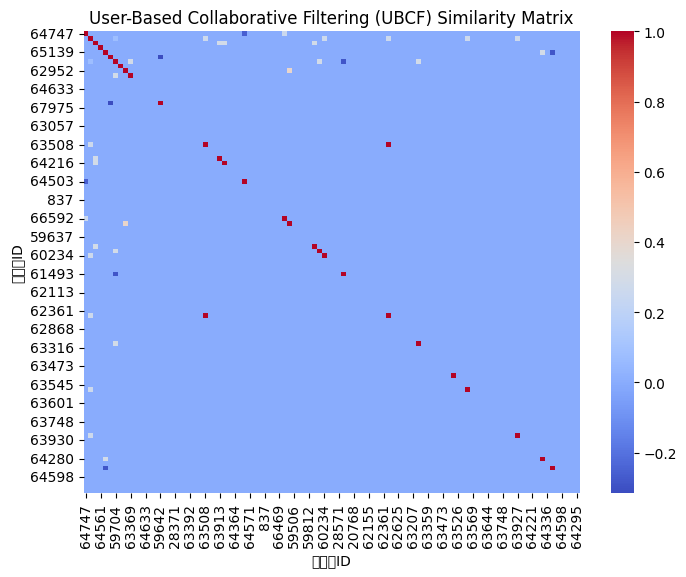

In [ ]:
# UBCF (User-Based Collaborative Filtering) 코사인 유사도 행렬 산출
user_similarity = cosine_similarity(preferred_val_sorted)
user_similarity_df = pd.DataFrame(user_similarity, index=preferred_val_sorted.index, columns=preferred_val_sorted.index)


# UBCF (User-Based Collaborative Filtering) Heatmap - 코사인 유사도
plt.figure(figsize=(8, 6))
sns.heatmap(user_similarity_df, cmap="coolwarm", cbar=True)
plt.title("User-Based Collaborative Filtering (UBCF) Similarity Matrix")
plt.show()

# 3.1.10 Item-Based Collaborative Filtering Matrix 시각화

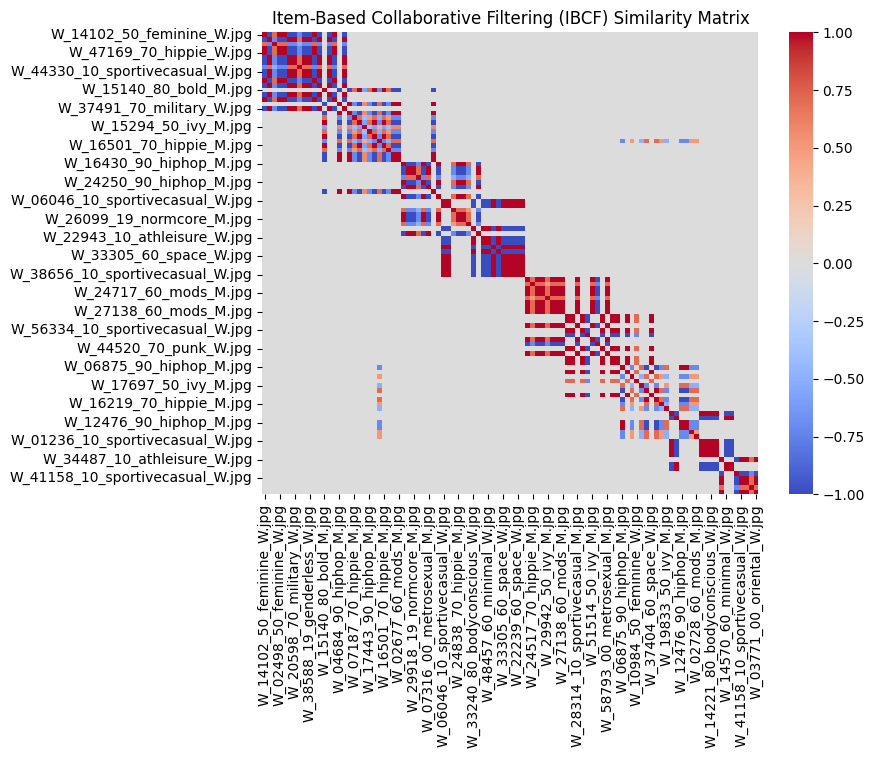

In [ ]:
# IBCF (Item-Based Collaborative Filtering) 코사인 유사도 행렬 산출
item_similarity = cosine_similarity(preferred_val_sorted.T)
item_similarity_df = pd.DataFrame(item_similarity, index=preferred_val_sorted.columns, columns=preferred_val_sorted.columns)


# IBCF (Item-Based Collaborative Filtering) Heatmap - 코사인 유사도
plt.figure(figsize=(8, 6))
sns.heatmap(item_similarity_df, cmap="coolwarm", cbar=True)
plt.title("Item-Based Collaborative Filtering (IBCF) Similarity Matrix")
plt.show()


**사용자 기반 협업 필터링(User-Based Collaborative Filtering)**은 사용자의 경험을 조합하여 추천을 하는 방식입니다. 취향이 비슷한 이웃 사용자를 알아내고, 이 그룹에 속한 사용자들이 공통적으로 좋게 평가한 아이템을 추천합니다.

**항목 기반 협업 필터링 (Item-Based Collaborative Filtering)**은 사용자들 간의 관계를 찾는 대신, 아이템을 서로 비교합니다. 반대로 사용자들의 선호도를 바탕으로 아이템 간의 유사도를 계산하여 사용자의 특정 아이템에 대한 예측 선호도를 계산하는 방식입니다.

**[적용 방법]**

1.사용자 대 항목 매트릭스를 만들며, 이 때 각 행은 사용자를, 각 열은 아이템(패션 스타일 이미지)를 입력합니다.

2.사용자 기반 협업 필터링(User-Based Collaborative Filtering)에서는 행(사용자)의 유사도를 계산합니다. 예를 들어 두 사람 중 한 사람은 '여성 에콜리지룩'과 '여성 오리엔탈룩'을 선호합니다. 두 번째 사람은 '여성 에콜리지룩'만 선호합니다. 사용자 기반 협업 필터링은 두 사람이 모두 '여성 에콜리지룩'을 선호한다는 유사성을 계산합니다. 그런 다음 ' 여성 오리엔탈룩'을 두 번째 사람에게 추천합니다.

3.항목 기반 협업 필터링 (Item-Based Collaborative Filtering)은 행 간의 유사도를 계산하는 대신, 열(패션 스타일 이미지) 간의 유사도를 계산해야 합니다. 예를 들어 세 명의 다른 사람들이 '여성 에콜리지룩'과 ' 여성 오리엔탈룩' 이 두 스타일을 모두 좋아했다면 '여성 에콜리지룩'과 ' 여성 오리엔탈룩' 이미지 사이에는 유사성이 있습니다. 만약 유사성이 충분히 높다면, '여성 에콜리지룩'만 선호하는 사람들에게 '여성 오리엔탈룩'을 추천할 수 있습니다


**[장단점]**

•	**사용자 기반 협업 필터링(User-Based Collaborative Filtering)**의 장점은 각 사용자별로 맞춤형 추천을 하기 때문에 데이터가 풍부한 경우 정확한 추천이 가능합니다. 사용자 간의 비교와 유사성 찾기는 계산이 복잡하여 많은 계산 자원이 소모됩니다. 또한 사람들의 습관은 시간이 지남에 따라 변할 수 있어 이를 계속해서 업데이트 해주어야 합니다.

•	**항목 기반 협업 필터링 (Item-Based Collaborative Filtering)**의 장점은 정확도는 떨어지지만 사용자별로 계산을 하지 않기 때문에 계산이 빠르다는 장점이 있습니다. 또한 데이터가 조금 바뀌어도 추천 결과에는 영향이 크지 않기 때문에 업데이트를 자주 하지 않아도 됩니다.

데이터 크기가 적고 각 사용자에 대한 충분한 정보(구매나 평가)가 있는 경우에는 사용자 기반 협업 필터링(User-Based Collaborative Filtering)이 우수하며, 데이터가 크거나 각 사용자에 대한 충분한 정보가 없는 경우에는 항목 기반 협업 필터링 (Item-Based Collaborative Filtering)가 적합합니다.

위의 히트맵을 보면 **User-Based Collaborative Filtering**에서는 대부분의 영역이 파란색으로 나타나며, 이는 유사도가 매우 낮거나 0에 가까운 값들을 의미합니다.
**Item-Based Collaborative Filtering**의 히트맵을 보면, 특정 영역에서 높은 유사도의 군집이 형성된 것을 볼 수 있습니다. 특히 여러 개의 아이템이 특정 그룹에 속하며 서로 높은 유사도를 가지는 패턴이 뚜렷합니다.
결론적으로 해당 **3-1 미션**에서는  **Item-Based Collaborative Filtering)**이 더 적합하다고 할수있습니다. 아이템 간 유사도를 통해 특정 스타일을 중심으로 유사한 아이템을 추천하기 때문에, 더 효율적이고 일관성 있는 추천을 제공할 수 있습니다.

# Mission 3-2

# 3.2.1 필요한 라이브러리 불러오기 device 및 random seed 설정

In [ ]:
import torch
import numpy as np
import pandas as pd
import random
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os

random.seed(42)                                                                   # Python의 random 모듈 시드 설정
np.random.seed(42)                                                                # NumPy 시드 설정
torch.manual_seed(42)                                                             # PyTorch 시드 설정
torch.cuda.manual_seed(42)                                                        # GPU 사용 시 CUDA 시드 설정
torch.backends.cudnn.deterministic = True                                         # 연산의 결정론적 수행 보장
torch.backends.cudnn.benchmark = False                                            # CUDA의 비결정론적 최적화 비활성화

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")             # GPU가 사용 가능하면 GPU를, 그렇지 않으면 CPU를 사용

# 3.2.2 데이터 전처리 및 증강

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # ResNet 입력 크기
    transforms.RandomHorizontalFlip(),  # 무작위로 좌우 반전
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 3.2.3 데이터셋 및 DataLoader 설정

In [ ]:
train_data_path = '/content/drive/MyDrive/Preprocessed_Data/training_category'  # 성별/스타일 별로 분류된 train 데이터 폴더
val_data_path = '/content/drive/MyDrive/Preprocessed_Data/validation_category'  # 성별/스타일 별로 분류된 validation 데이터 폴더

# 3.2.4 ImageFolder에서 파일 이름 추출을 위해 데이터 로더 수정

In [ ]:
class ImageFolderWithPaths(datasets.ImageFolder):
    def __getitem__(self, index):
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]  # 이미지 경로
        return original_tuple + (path,)  # 이미지와 라벨, 경로 반환

# 3.2.5 Validation 및 Training 데이터 로더를 ImageFolderWithPaths로 설정

In [ ]:
val_dataset_with_paths = ImageFolderWithPaths(root=val_data_path, transform=transform)
val_loader_with_paths = DataLoader(val_dataset_with_paths, batch_size=32, shuffle=False, num_workers=2)

train_dataset_with_paths = ImageFolderWithPaths(root=train_data_path, transform=transform)
train_loader_with_paths = DataLoader(train_dataset_with_paths, batch_size=32, shuffle=True, num_workers=2)

# 3.2.6 클래스 이름 확인

In [ ]:
classes = val_dataset_with_paths.classes
print(f"클래스 목록: {classes}")
num_classes = len(classes)  # 총 클래스 수

클래스 목록: ['남성_bold', '남성_hiphop', '남성_hippie', '남성_ivy', '남성_metrosexual', '남성_mods', '남성_normcore', '남성_sportivecasual', '여성_athleisure', '여성_bodyconscious', '여성_cityglam', '여성_classic', '여성_disco', '여성_ecology', '여성_feminine', '여성_genderless', '여성_grunge', '여성_hiphop', '여성_hippie', '여성_kitsch', '여성_lingerie', '여성_lounge', '여성_military', '여성_minimal', '여성_normcore', '여성_oriental', '여성_popart', '여성_powersuit', '여성_punk', '여성_space', '여성_sportivecasual']


# 3.2.7 Feature Vector 추출을 위한 ResNet-18 모델 정의

In [ ]:
class CustomResNet18(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet18, self).__init__()
        self.resnet = models.resnet18(pretrained=False)  # 무작위 초기화
        in_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(in_features, num_classes)  # 마지막 레이어를 클래스 수에 맞게 수정
        self.feature_extractor = nn.Sequential(*list(self.resnet.children())[:-1])  # 마지막 fc 레이어 이전까지

    def forward(self, x):
        features = self.feature_extractor(x)  # feature vector 추출
        features = features.view(features.size(0), -1)  # flatten (fully connected로 들어가기 전 flatten)
        output = self.resnet.fc(features)  # 클래스 분류
        return features, output  # feature와 분류 결과를 함께 반환

model = CustomResNet18(num_classes=num_classes).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


# 3.2.8 Mission 1-2에서 학습한 모델 가중치 불러오기

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/Mission 3-2/resnet18.pth'))

<ipython-input-26-90db42078e45>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/content/drive/MyDrive/Mission 3-2/resnet18.pth'))


<All keys matched successfully>

# 3.2.9 Feature Vector 추출 및 저장 (이미지 파일 이름 포함)

In [ ]:
def save_feature_vectors_with_filenames(loader, model, save_path):
    model.eval()  # 평가 모드
    feature_vectors = []
    labels = []
    filenames = []

    with torch.no_grad():  # 기울기 계산 비활성화
        for images, label, paths in loader:
            images = images.to(device)
            features, _ = model(images)  # feature 추출
            feature_vectors.append(features.cpu())  # CPU로 이동해서 저장
            filenames.extend(paths) # 이미지 파일 경로 저장
            # filenames.extend([os.path.basename(path) for path in paths])  # 이미지 파일명 저장

    # feature vectors와 labels를 하나의 텐서로 결합
    feature_vectors = torch.cat(feature_vectors, dim=0)

    # feature vectors, filenames를 저장
    torch.save({'features': feature_vectors, 'filenames': filenames}, save_path)
    print(f"Feature vectors and filenames saved to {save_path}")

# 3.2.10 Training,Validation 데이터의 feature vector 저장 경로설정

In [ ]:
save_path_train = '/content/drive/MyDrive/Mission 3-2/train_feature_vectors_with_filenames.pth'
save_path_val = '/content/drive/MyDrive/Mission 3-2/val_feature_vectors_with_filenames.pth'

# 3.2.11 ImageFolder에서 파일 이름 추출을 위해 데이터 로더 수정

In [ ]:
class ImageFolderWithPaths(datasets.ImageFolder):
    def __getitem__(self, index):
        # 기본 ImageFolder의 동작을 유지하되, 이미지 경로도 반환
        original_tuple = super(ImageFolderWithPaths, self).__getitem__(index)
        path = self.imgs[index][0]  # 이미지 경로
        return original_tuple + (path,)  # 이미지와 라벨, 경로 반환

# 3.2.12 Validation 및 Training 데이터 로더를 ImageFolderWithPaths로 설정

In [ ]:
val_dataset_with_paths = ImageFolderWithPaths(root=val_data_path, transform=transform)
val_loader_with_paths = DataLoader(val_dataset_with_paths, batch_size=32, shuffle=False, num_workers=2)

train_dataset_with_paths = ImageFolderWithPaths(root=train_data_path, transform=transform)
train_loader_with_paths = DataLoader(train_dataset_with_paths, batch_size=32, shuffle=True, num_workers=2)

# 3.2.13 Validation 및 Training 데이터의 feature vector와 파일 이름을 저장

In [ ]:
save_feature_vectors_with_filenames(train_loader_with_paths, model, save_path_train)
save_feature_vectors_with_filenames(val_loader_with_paths, model, save_path_val)

Feature vectors and filenames saved to /content/drive/MyDrive/Mission 3-2/train_feature_vectors_with_filenames.pth
Feature vectors and filenames saved to /content/drive/MyDrive/Mission 3-2/val_feature_vectors_with_filenames.pth


# 3.2.14 코사인 유사도 계산 함수

In [ ]:
def cosine_similarity_matrix(train_vectors, val_vectors):
    # train_vectors: (N_train, D)
    # val_vectors: (N_val, D)

    # Normalize the vectors to unit vectors for cosine similarity calculation
    train_vectors = F.normalize(train_vectors, p=2, dim=1)  # (N_train, D)
    val_vectors = F.normalize(val_vectors, p=2, dim=1)      # (N_val, D)

    # Cosine similarity between each pair of train and val vectors
    similarity_matrix = torch.mm(val_vectors, train_vectors.T)  # (N_val, N_train)

    return similarity_matrix

# 3.2.15 Feature vector 불러오기 (train과 val 데이터셋 각각)

In [ ]:
# 저장된 feature vector 파일 경로
train_path = '/content/drive/MyDrive/Mission 3-2/train_feature_vectors_with_filenames.pth'
val_path = '/content/drive/MyDrive/Mission 3-2/val_feature_vectors_with_filenames.pth'

# train과 validation feature vectors 불러오기
train_checkpoint = torch.load(train_path)
val_checkpoint = torch.load(val_path)

# Feature vectors
train_vectors = train_checkpoint['features']  # (N_train, D)
val_vectors = val_checkpoint['features']      # (N_val, D)

# 이미지 파일 이름 리스트 (optional, 필요할 경우 사용)
train_filenames = train_checkpoint['filenames']  # 각 train 이미지 파일 이름
val_filenames = val_checkpoint['filenames']      # 각 validation 이미지 파일 이름

<ipython-input-34-2706566a5ce4>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_checkpoint = torch.load(train_path)
<ipython-input-34-2706566a5ce4>:7: FutureWarning: 

# 3.2.16 유사도 행렬 계산 및 저장 (validation 이미지와 train 이미지 간의 유사도)

In [ ]:
similarity_matrix = cosine_similarity_matrix(train_vectors, val_vectors)

# 유사도 행렬 출력
print("유사도 행렬 크기:", similarity_matrix.shape)  # (N_val, N_train)

# 유사도 행렬 저장
def save_similarity_matrix(similarity_matrix, save_path):
    torch.save(similarity_matrix, save_path)
    print(f"유사도 행렬이 {save_path}에 저장되었습니다.")

similarity_matrix_save_path = '/content/drive/MyDrive/Mission 3-2/similarity_matrix.pth'
save_similarity_matrix(similarity_matrix, similarity_matrix_save_path)

유사도 행렬 크기: torch.Size([951, 4070])
유사도 행렬이 /content/drive/MyDrive/Mission 3-2/similarity_matrix.pth에 저장되었습니다.


# 3.2.17 Mission 2-2에서 작성한 '스타일 선호 정보표' 불러오기


In [ ]:
top100_df=pd.read_csv('/content/drive/MyDrive/top_100_r_id_table.csv')

# 3.2.18 파일경로를 파일 이름으로 변환

In [ ]:
train_filenames_basename=[os.path.basename(filename) for filename in train_filenames]
val_filenames_basename=[os.path.basename(filename) for filename in val_filenames]

# 3.2.19 각 행의 아이템들을 분리한 후 인덱스를 찾는 작업을 행렬로 수행

In [ ]:
def get_item_indices(top100_df_column, train_filenames_basename):
    """
    top100_df의 특정 열에서 아이템 리스트를 추출하여, 해당 아이템이 train_filenames_basename에 존재할 경우 인덱스를 반환하는 함수.

    Args:
        top100_df_column: top100_df의 특정 열 (유저가 선호하거나 비선호하는 아이템 리스트)
        train_filenames_basename: train 데이터셋의 파일명 리스트

    Returns:
        아이템 인덱스를 포함한 리스트의 리스트 (각 행에 대해 아이템의 인덱스를 찾음)
    """
    item_indices = []  # 아이템 인덱스를 저장할 리스트

    for row in top100_df_column:  # top100_df의 각 행에 대해
        if isinstance(row, str):  # 행이 문자열일 때만 처리
            user_train_items = row.split(', ')  # ','로 구분된 파일명을 리스트로 분리
            row_indices = []  # 해당 행의 인덱스를 저장할 리스트

            for filename in user_train_items:
                if filename in train_filenames_basename:
                    tn_index = train_filenames_basename.index(filename)  # train_filenames_basename에서 인덱스를 찾음
                    row_indices.append(tn_index)

            item_indices.append(row_indices)  # 각 행의 인덱스 리스트를 행렬에 추가
        else:
            item_indices.append([])  # 문자열이 아니면 빈 리스트 추가

    return item_indices

# 3.2.20 함수 호출 예시

In [ ]:
preferred_tn_indices = get_item_indices(top100_df.iloc[:, 1], train_filenames_basename)  # train 선호 아이템
nonpreferred_tn_indices = get_item_indices(top100_df.iloc[:, 2], train_filenames_basename)  # train 비선호 아이템
preferred_val_indices = get_item_indices(top100_df.iloc[:, 3], val_filenames_basename)  # valid 선호 아이템
nonpreferred_val_indices = get_item_indices(top100_df.iloc[:, 4], val_filenames_basename)  # valid 비선호 아이템

# 3.2.21 유사도 행렬에서 각 아이템에 대한 선호/비선호 유사도 계산 함수

In [ ]:
def classify_and_compare(similarity_matrix, user_preferred_train_items, user_nonpreferred_train_items):
    # 유사도 행렬에서 각 아이템에 대한 선호/비선호 유사도 계산 함수
    def classify_items(similarity_matrix, user_train_items_list):
        aggregated_similarity_list = []

        # 각 행에 대해 유사도 계산
        for user_train_items in user_train_items_list:
            if len(user_train_items) == 0:  # 빈 리스트인 경우 처리
                aggregated_similarity = torch.zeros(similarity_matrix.shape[0])  # (N_val,)
            else:
                aggregated_similarity = torch.zeros(similarity_matrix.shape[0])  # (N_val,)
                for train_idx in user_train_items:
                    aggregated_similarity += similarity_matrix[:, train_idx]
                aggregated_similarity /= len(user_train_items)  # 선호 아이템 수로 나눔
            aggregated_similarity_list.append(aggregated_similarity)

        return aggregated_similarity_list

    # 선호 및 비선호 아이템 유사도 계산 (각 행에 대해)
    classification_preferred = classify_items(similarity_matrix, user_preferred_train_items)
    classification_nonpreferred = classify_items(similarity_matrix, user_nonpreferred_train_items)

    # 유사도 값 비교하여 최종 분류 (행마다)
    final_classification = []
    for preferred, nonpreferred in zip(classification_preferred, classification_nonpreferred):
        row_classification = [
            2 if p > u else 1
            for p, u in zip(preferred, nonpreferred)
        ]
        final_classification.append(row_classification)

    return final_classification


# 3.2.22 유저가 선호하는 training 아이템 리스트 정의 및 val 데이터 최종분류

In [ ]:
user_preferred_train_items = preferred_tn_indices  # 유저가 선호한 training 데이터셋의 아이템 인덱스들
user_nonpreferred_train_items = nonpreferred_tn_indices  # 유저가 비선호한 training 데이터셋의 아이템 인덱스들

final_classification=classify_and_compare(similarity_matrix,user_preferred_train_items,user_nonpreferred_train_items) #검증 데이터에 대한 최종 분류 결과 생성

# 3.2.23 추천 시스템에서 분류한 validation 이미지의 선호, 비선호가 정답지랑 맞는지 Accuracy 산출

In [ ]:
def calculate_accuracy(final_classification, preferred_val_indices, nonpreferred_val_indices, total_len=951):
    """
    preferred_val_indices에 해당하는 값은 2, nonpreferred_val_indices에 해당하는 값은 1로 하여
    classify_answer 리스트를 만들고, final_classification과 비교하여 선호도 없는 경우는 제외하고 정확도를 산출하는 함수.

    Args:
        final_classification: 예측한 값들이 들어 있는 리스트 (100개의 리스트, 각 리스트는 951개의 값)
        preferred_val_indices: 선호 아이템 인덱스 리스트
        nonpreferred_val_indices: 비선호 아이템 인덱스 리스트
        total_len: validation 데이터셋의 전체 길이 (디폴트: 951)

    Returns:
        accuracy: final_classification과 classify_answer의 일치 비율 (선호도 없는 경우 제외)
        classify_answer: 실제 정답 레이블 리스트 (951개)
    """

    classify_answer = [0] * total_len  # 길이를 total_len으로 맞춘 classify_answer 리스트 생성

    # 각 validation 아이템에 대해 classify_answer를 만듦
    for i in range(total_len):
        if i in [idx for sublist in preferred_val_indices for idx in sublist]:
            classify_answer[i] = 2  # 선호 아이템인 경우
        elif i in [idx for sublist in nonpreferred_val_indices for idx in sublist]:
            classify_answer[i] = 1  # 비선호 아이템인 경우
        # 선호도 없는 경우는 0으로 그대로 둠

    # 선호도 없는 경우(0)를 제외하고 valid indices 리스트 생성
    valid_indices = [i for i, ans in enumerate(classify_answer) if ans != 0]
    valid_classify_answer = [classify_answer[i] for i in valid_indices]

    # 각 100개의 리스트에 대해 valid_final_classification 생성
    valid_final_classification = []
    for classification in final_classification:
        valid_classification_row = [classification[i] for i in valid_indices]
        valid_final_classification.append(valid_classification_row)

    # 정확도 계산
    correct_predictions = sum([1 for pred_list, ans in zip(valid_final_classification, valid_classify_answer)
                               for pred in pred_list if pred == ans])
    accuracy = correct_predictions / len(valid_classify_answer) if len(valid_classify_answer) > 0 else 0

    return accuracy, classify_answer

# 예시로 accuracy 계산
accuracy, classify_answer = calculate_accuracy(final_classification, preferred_val_indices, nonpreferred_val_indices, total_len=951)

print("Accuracy:", accuracy)

Accuracy: 50.38906414300736



## ※ 예측 문제에서 활용한 파라미터 및 임계 값 등의 수치를 정확하게 제시

파라미터의 경우 사전에 학습된 특성을 활용하여 효율적이고 성능 높은 피처 벡터 추출을 가능하게 하기 위해 Mission 1-2에서 사용한 RESNET-18 모델의 **최종학습 가중치**를 불러왔고 **Feature Extractor**를 사용해 ResNet-18 모델의 마지막 FC (fully connected) 레이어 직전까지를 추출하여 피처 벡터를 생성하였습니다. 임계 값의 경우 주어진 데이터셋이 **선호/비선호** 즉 **이진분류** 데이터기 때문에 임의의 임계값이 아닌 **상대적 비교**로 결정하였습니다 **classify_and_compare** 함수를 사용해 각 사용자가 선호하는 학습 데이터의 유사도 값과 비선호하는 학습 데이터의 유사도 값을 검증 데이터셋의 각 아이템에 대해 비교하였고 **final_classification** 함수를 사용해 **선호유사도>비선호유사도일때는 선호(2)**  , **비선호 유사도 > 선호 유사도일때는 비선호(1)**로 분류하여 예측한결과가 실제 선호도와 얼마나 일치하는지를 비교하는 방식으로 모델링하였습니다.